In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
pip install chart_studio

  Using cached https://files.pythonhosted.org/packages/ca/ce/330794a6b6ca4b9182c38fc69dd2a9cbff60fd49421cb8648ee5fee352dc/chart_studio-1.1.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
import chart_studio
username = 'yashaswi2092'
api_key = 'HLkkiB1rjck0XHn1KCyN'

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [4]:
import chart_studio.plotly as py
import chart_studio.tools as tls

In [5]:
import plotly.graph_objs as go
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import plotly_express as px
%matplotlib inline

In [6]:
import re
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [9]:
# Reading CSV Data


# Goodreads Dataset
books_data = pd.read_csv('data/books.csv',error_bad_lines = False)
tags_data = pd.read_csv('data/book_tags.csv')
ratings_data = pd.read_csv('data/ratings.csv')
book_tags = pd.read_csv('data/tags.csv')

# Bookcrossing Datasert
user_cols = ['user_id', 'location', 'age']
cross_users_data = pd.read_csv('data/BX-Users.csv', sep=';', names=user_cols, encoding='latin-1', low_memory=False, skiprows=1)
book_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
cross_books_data = pd.read_csv('data/BX_Books.csv', sep=';', names=book_cols, encoding='latin-1', low_memory=False, skiprows=1)
rating_cols = ['user_id', 'isbn', 'rating']
cross_ratings_data = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', names=rating_cols, encoding='latin-1', low_memory=False, skiprows=1)

In [10]:
books_data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [11]:
cross_books_data.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
books_data = books_data.dropna()
cross_books_data = cross_books_data.drop(columns=['img_s', 'img_m', 'img_l'])

In [13]:
ratings_data = ratings_data.sort_values("user_id")
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
books_data.drop_duplicates(subset='original_title',keep=False,inplace=True)
book_tags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
tags_data.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)
cross_ratings_data.drop_duplicates(subset =["user_id","isbn"], keep = False, inplace = True) 
cross_books_data.drop_duplicates(subset='book_title',keep=False,inplace=True)

### Cleaning the text data

In [14]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
cross_books_data['book_title'] = cross_books_data['book_title'].apply(lambda x:clean_text(x))
merge_data = pd.merge(cross_books_data, cross_ratings_data, on='isbn')
merge_data =  merge_data.sort_values('isbn', ascending=True)
merge_data.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating
626418,0000913154,the way things work an illustrated encyclopedi...,C. van Amerongen (translator),1967,Simon & Schuster,171118,8
587195,0001010565,mogs christmas,Judith Kerr,1992,Collins,209516,0
587194,0001010565,mogs christmas,Judith Kerr,1992,Collins,86123,0
441049,0001046713,twopence to cross the mersey,Helen Forrester,1992,HarperCollins Publishers,196149,0
263949,000104687X,ts eliot reading the wasteland and other poems,T.S. Eliot,1993,HarperCollins Publishers,23902,6


## Top Rated Books

In [28]:
top_rated = books_data.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[:25]
fig1 = px.bar(tf_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='original_title', width=1500, height=700)
fig1.show()

In [29]:
#Importing the graph in plotly dashboard
py.plot(fig1, filename = 'top_rated_books', auto_open = True)

'https://plotly.com/~yashaswi2092/7/'

In [30]:
tls.get_embed('https://plotly.com/~yashaswi2092/7/#/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~yashaswi2092/7.embed" height="525" width="100%"></iframe>'

In [23]:
fig2 = px.treemap(tf_top_rated, path=['original_title'], values='average_rating',title='Top Rated Books', width=1000, height=700)
fig2.show()

In [25]:
#Importing the graph in plotly dashboard
py.plot(fig2, filename = 'top_rated_books_tree', auto_open = True)

'https://plotly.com/~yashaswi2092/5/'

In [27]:
tls.get_embed('https://plotly.com/~yashaswi2092/5/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~yashaswi2092/5.embed" height="525" width="100%"></iframe>'

## Most Popular Books

In [31]:
top_popular = books_data.sort_values('ratings_count', ascending=False)
fifty_top_popular = top_popular[:50]
fig = px.bar(fifty_top_popular, x="ratings_count", y="original_title", title='Top Popular Books', orientation='h', color='original_title',
             width=1500, height=700)
fig.show()

In [34]:
fig = px.treemap(fifty_top_popular, path=['original_title'], values='ratings_count',title='Popular Books', width=1000, height=700)
fig.show()


## Top Authors

In [34]:
fifty_top_authors = top_rated[:50]
fig4 = px.treemap(fifty_top_authors, path=['authors'], values='average_rating',title='Popular Authors', width=1000, height=700)
fig4.show()

In [35]:
#Importing the graph in plotly dashboard
py.plot(fig4, filename = 'top_authors_tree', auto_open = True)

'https://plotly.com/~yashaswi2092/11/'

In [36]:
tls.get_embed('https://plotly.com/~yashaswi2092/11/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~yashaswi2092/11.embed" height="525" width="100%"></iframe>'

In [31]:
top_author_counts = books_data['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig3 = px.bar(top_author_counts.tail(50), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig3.show()

In [32]:
#Importing the graph in plotly dashboard
py.plot(fig3, filename = 'top_authors', auto_open = True)

'https://plotly.com/~yashaswi2092/9/'

In [33]:
tls.get_embed('https://plotly.com/~yashaswi2092/9/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~yashaswi2092/9.embed" height="525" width="100%"></iframe>'

## Rating Distribution

In [47]:
merge_data['rating'].value_counts().iplot(kind='bar',
                                         xTitle='Rating',
                                         yTitle='Counts',
                                         title='Rating Distribution',
                                         color='blue')


## WordClouds

In [38]:
stop_words=set(STOPWORDS)
author_string = " ".join(books_data['authors'])
title_string = " ".join(books_data['original_title'])
cross_author_string = " ".join(merge_data['book_author'].astype(str))
cross_title_string = " ".join(merge_data['book_title'].astype(str))
cross_publisher_string = " ".join(merge_data['publisher'].astype(str))

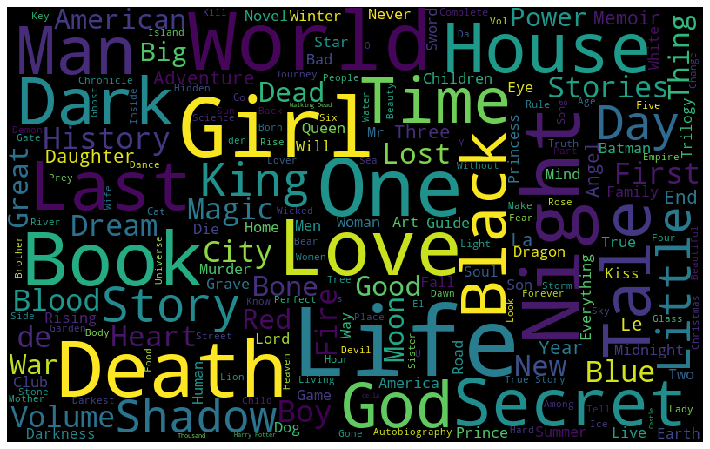

In [39]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

fig6 = wordcloud(title_string)

In [41]:
#Importing the graph in plotly dashboard
py.plot(fig6, filename = 'top_words', auto_open = True)

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure